# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

In [14]:
!g++ -o binaries/tp_openmp_part_3_fib binaries/tp_openmp_part_3_fib.cpp -fopenmp -O3 -march=native
!g++ -o binaries/tp_openmp_part_3_fib_parallel binaries/tp_openmp_part_3_fib_parallel.cpp -fopenmp -O3 -march=native

### Performance evaluation

In [13]:
import os
import subprocess

try:
    os.remove("../pi_Stats.csv")
    f=open("../pi_Stats.csv","w+")
    f.write("version,num_steps,nbcore,runtime,pi\n")
    f.close()
except OSError:
    pass

num_steps = [10000, 1000000, 100000000]#, 1000000000000]
nb_core = [1, 2, 4, 8]
repeats = range(0,10)

for nsteps in num_steps:
    for ncore in nb_core:
        for repeat in repeats:
            args = ("binaries/tp_openmp_part_1_pi", "-C", str(ncore), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("binaries/tp_openmp_part_1_pi_impl_critical", "-C", str(ncore), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("binaries/tp_openmp_part_1_pi_impl_reduce", "-C", str(ncore), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("binaries/tp_openmp_part_1_pi_impl_atomic", "-C", str(ncore), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("binaries/tp_openmp_part_1_pi_splitArray", "-C", str(ncore), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()



### Performance analysis
#### Weak scaling

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


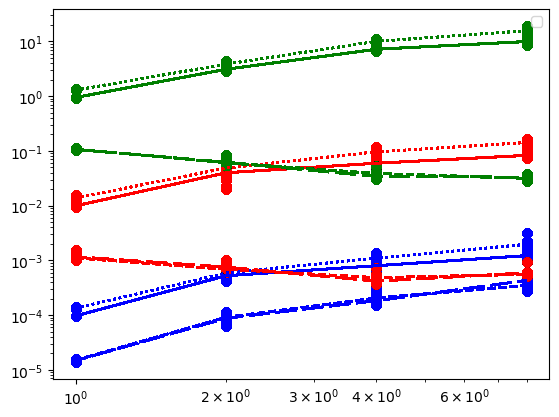

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../pi_Stats.csv',header=0,dtype={
                    'version': str,
                    'nbcore': "int64",
                    'num_steps' : "int64",
                    'runtime' : "float64",
                    'pi' : "float64"
                 }
                 )


color_num_steps = {10000 : "blue", 1000000 : "red", 100000000 : "green", 10000000000 : "black"}

for num_steps in df['num_steps']:
    #Atomic
    df_plot = df[(df['num_steps'] == int(num_steps))]
    df_plot = df_plot[df_plot['version'] == "Atomic"]
    
    mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="solid",color=color_num_steps[num_steps])
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])

    #Reduce
    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "Reduce")]
    mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="dashed",color=color_num_steps[num_steps])
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])

    #Critical
    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "Critical")]
    mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle="dotted",color=color_num_steps[num_steps])
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])

    #SplitArray
    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "Split_array")]
    mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle=(5, (10, 3)),color=color_num_steps[num_steps])
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])

    #Sequential
    df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "Sequential")]
    mean_stats = df_plot.groupby(['num_steps','version','nbcore']).mean().reset_index()
    
    plt.plot(mean_stats['nbcore'], mean_stats['runtime'],linestyle= (0, (3, 5, 1, 5, 1, 5)),color=color_num_steps[num_steps])
    plt.yscale('log')
    plt.xscale('log')
    plt.scatter(df_plot['nbcore'], df_plot['runtime'],color=color_num_steps[num_steps])
    
plt.legend()
plt.show()

#### Strong Scaling

### Discussion